## Interprétabilité des modèles
### Bedbugs
#### Lila R., Léa C., Flavie K.

L'objectif est d'expliquer les features les plus influentes dans la prédiction des prix d'hôtels. 

Nous allons utiliser des méthodes agnostiques, c'est à dire utilisant le modèle comme une boîte noire.

In [ ]:
#import
import pandas as pd

In [ ]:
#0 supprimer si pas d'erreurs
#!pip install pandas-profiling==2.8.0 > /dev/null 2>&1
#!pip install pandas==0.25 > /dev/null 2>&1
#!pip install numpy==1.16.5 > /dev/null 2>&1

In [ ]:
#!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 19 kB/s 


In [ ]:
#pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 1.0 MB/s 


In [21]:
from google.colab import drive
import os

# drive conexion:
drive.mount('/content/drive') 

utilities_folder = '/content/drive/My Drive/Defi-IA-bedbugs/utilities'

os.chdir(utilities_folder) # placer dans le dossier utilites

from set_path import *
print(PATH)
print(PATH_CODE)
print(PATH_DATA)
#...etc 

import data_preprocessing as DP

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Defi-IA-bedbugs
/content/drive/My Drive/Defi-IA-bedbugs/utilities
/content/drive/My Drive/Defi-IA-bedbugs/data


## Interprétabilité du modèle sans adversarial validation

In [23]:
name_testKaggle = "test_set_cleaned_addedFeatures.csv"
name_requests = 'pricing_requests_clean.csv'
name_featHotels = 'features_hotels.csv'

X_train,Y_train,X_val,Y_val,X_test,Y_test = DP.main_data_preprocessing(
    name_requests,
    name_featHotels,
    encoding='targetFreq',
    name_testKaggle=name_testKaggle, 
    price=1,stock=1,
    drop_requests_duplicates=1,
    adversarial_validation=0,
    save_encoding=1,
    encode_all_same=0,
    save_datasets=0)

X_train=X_train.drop("request_number", axis=1)
X_test=X_test.drop("request_number", axis=1)

KeyError: ignored

Train a linear regression, a random forest and a neural network to predict the houses price.  
Test all models on your test set to copare their performances.  
Feel free to train and test more sophisticated models such as XGBoost, LightGBM...

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import catboost as cb 

cb = make_pipeline(
    StandardScaler(),
    cb.CatBoostRegressor(loss_function="RMSE", depth=12, learning_rate=0.2, iterations=1000, l2_leaf_reg=0.2),
)

cb.fit(X_train, y_train)
print(f"Cat boost score: {cb.score(X_test, y_test):.2f}")

0:	learn: 2.4446670	total: 231ms	remaining: 3m 50s
1:	learn: 1.9902502	total: 393ms	remaining: 3m 15s
2:	learn: 1.6289968	total: 561ms	remaining: 3m 6s
3:	learn: 1.3403701	total: 737ms	remaining: 3m 3s
4:	learn: 1.1147234	total: 901ms	remaining: 2m 59s
5:	learn: 0.9366144	total: 1.07s	remaining: 2m 56s
6:	learn: 0.7990635	total: 1.23s	remaining: 2m 54s
7:	learn: 0.6926935	total: 1.4s	remaining: 2m 53s
8:	learn: 0.6114683	total: 1.57s	remaining: 2m 52s
9:	learn: 0.5512707	total: 1.74s	remaining: 2m 52s
10:	learn: 0.5060406	total: 1.91s	remaining: 2m 51s
11:	learn: 0.4702271	total: 2.07s	remaining: 2m 50s
12:	learn: 0.4428781	total: 2.23s	remaining: 2m 49s
13:	learn: 0.4216463	total: 2.41s	remaining: 2m 49s
14:	learn: 0.4069086	total: 2.58s	remaining: 2m 49s
15:	learn: 0.3943568	total: 2.76s	remaining: 2m 49s
16:	learn: 0.3866582	total: 2.92s	remaining: 2m 49s
17:	learn: 0.3801829	total: 3.1s	remaining: 2m 49s
18:	learn: 0.3678015	total: 3.28s	remaining: 2m 49s
19:	learn: 0.3624110	total

Linear models are considered intrinsically interpretable.  
Using the ```coef_``` attribute of your model, visualize the importance of each of the features of the linear model.  

### Features importance

We will begin by looking at the features importance.  
Scikit-learn implements some native methods to compute the feature importance of tree-based methods.  
We will use an external library called [Eli5](https://eli5.readthedocs.io/en/latest/overview.html#features) to compute the feature permutation method, which is model agnostic and can thus be applied to our three models.



In [ ]:
!pip install eli5 > /dev/null 2>&1

Use the ```PermutationImportance``` to compute the features importance of your models.  (Documentation [here](https://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html)).  
Plot them for each of your model.  
Are the feature importance of the linear model similar to the coefficients?
Are the features as important for all your models?  
Create a dictionnary containing the top 5 features for each of your model (**key**:model name, **value**: dataframe of features importance)

In [ ]:

rf = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(bootstrap=True, max_depth=10, n_estimators=1000)
)

rf.fit(X_train, y_train)
print(f"Cat boost score: {rf.score(X_test, y_test):.2f}")

Cat boost score: 0.99


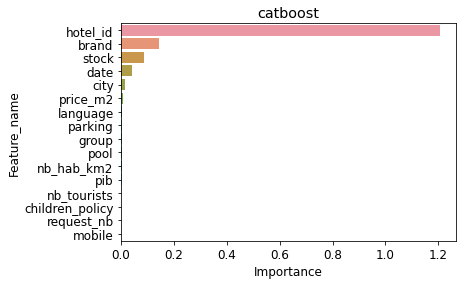

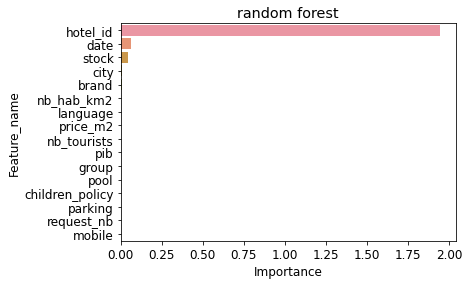

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
import matplotlib.pyplot as plt
import seaborn as sns

feature_names= X_train.columns.tolist()
features_importance_dict = {}
for model, name in zip([cb, rf], ['catboost', 'random forest']):
  plt.figure()
  permumtation_impor = PermutationImportance(model, random_state=0).fit(X_test, y_test)
  features_importance = {'Feature_name':feature_names, 'Importance':permumtation_impor.feature_importances_}  
  features_importance = pd.DataFrame(features_importance) 
  features_importance = features_importance.sort_values(['Importance'], ascending=False) 
  features_importance_dict[name] = features_importance
  ax = sns.barplot(x="Importance", y="Feature_name", data=features_importance)
  plt.title(name)

### PDP and ICE plots

We will use the [pdpbox](https://pdpbox.readthedocs.io/en/latest/) library to generate our PDP and ICE plots.

In [ ]:
!pip install pdpbox > /dev/null 2>&1

The following code shows you how to produce a PDP plot for the random forest model.  
```python
from pdpbox import pdp, get_dataset, info_plots

pdp_feat = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=feature_names, feature='MedInc')

pdp.pdp_plot(pdp_feat, 'MedInc', plot_lines=True, frac_to_plot=0.5)
plt.show()
```
Use it to generate the PDP plots for the three most important features of each of your models.  
What is the nature of their relationship with the target?


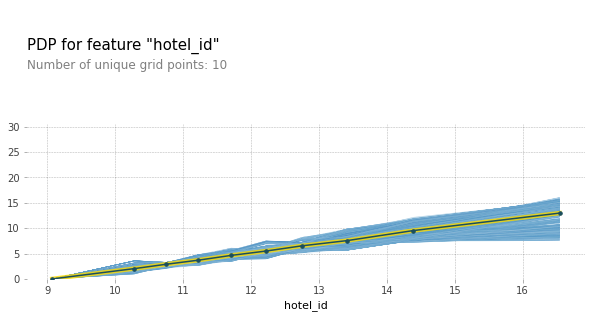

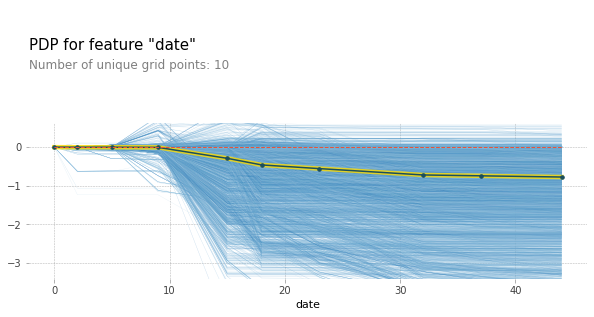

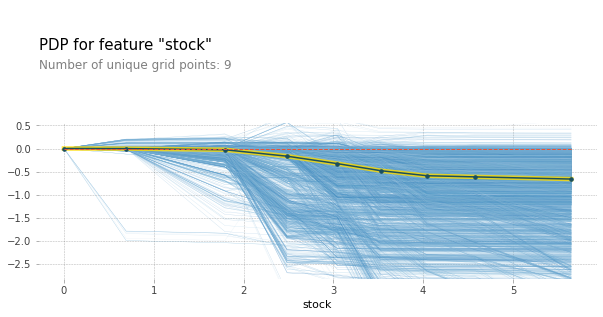

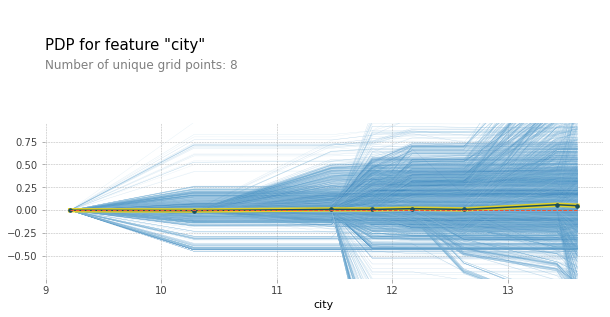

In [ ]:
from pdpbox import pdp, get_dataset, info_plots
model = rf #lr, mlp
model_name = 'random forest'#'logistic regression' , 'multi layer perceptron'

top_4_features = features_importance_dict[model_name].Feature_name[:4].values
for i, feature in enumerate(top_4_features, 1):
  pdp_feat = pdp.pdp_isolate(model=model, dataset=X_test, model_features=feature_names, feature=feature)
  pdp.pdp_plot(pdp_feat, feature, plot_lines=True, frac_to_plot=0.1, figsize=(10,5))
  plt.show()

It is also possible to visualize the combined effetc of two features:

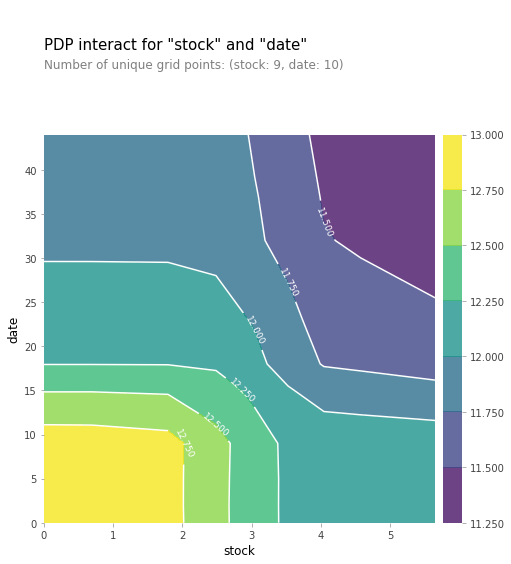

In [ ]:
features_to_plot = ['stock', 'date']
inter1 = pdp.pdp_interact(model=model, dataset=X_test, model_features=feature_names, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

Scikit-learns also provides methods to generate such plots, but may offer less flexibility.

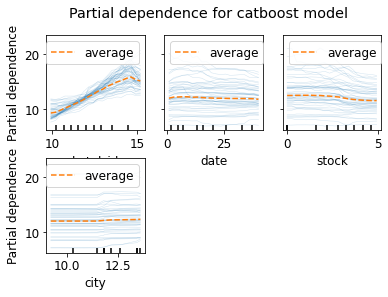

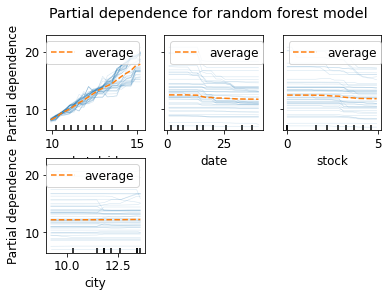

In [ ]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay

for model, model_name in zip([cb, rf], ['catboost', 'random forest']):

  top_3_features = features_importance_dict[name].Feature_name[:4].values
  display = PartialDependenceDisplay.from_estimator(
    model,
    X_test,
    top_3_features,
    kind="both",
    subsample=50,
    n_jobs=3,
    n_cols=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.2, "linewidth": 0.5},
    pd_line_kw={"color": "tab:orange", "linestyle": "--"}
    )
  display.figure_.suptitle(f"Partial dependence for {model_name} model")
  display.figure_.subplots_adjust(hspace=0.3)

NameError: ignored

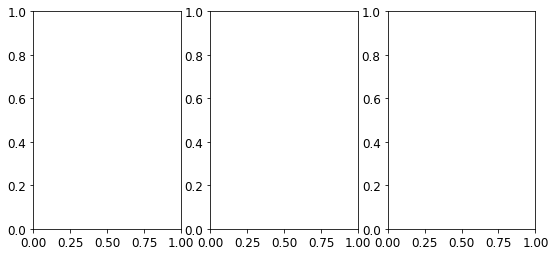

In [ ]:
for model, name in zip([cb, rf], ['catboost', 'random forest']):
  _, ax = plt.subplots(ncols=3, figsize=(9, 4))
  top_2_features = features_importance_dict[name].Feature_name[:3].values
  features = [top_2_features[0], top_2_features[1], (top_2_features[0], top_2_features[1])]
  display = PartialDependenceDisplay.from_estimator(
      model,
      X_test,
      features,
      kind="average",
      n_jobs=3,
      grid_resolution=20,
      ax=ax,
  )
  display.figure_.suptitle(f"Partial dependence for {name} model")
  display.figure_.subplots_adjust(wspace=0.4, hspace=0.3)

### SHAP

Previous methods provided global explanations of our models.  
We will now focus on local interpretability methods.  
We will begin with the SHAP methods based on the estimation of the Shapley values.  
The library SHAP implements the SHAP method (and many others).

Inspire yourself with the following [documentation](https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Diabetes%20regression.html) to produce a visualization of the estimated Shapley values of your different models, first for a single example using the ```force_plot``` method and for the entire test, dataset using the ```summary_plot``` method.

In [ ]:
!pip install shap > /dev/null 2>&1

In [ ]:
import shap
shap.initjs() #needed to plot results directly on the notebook

idx = 1 # index of the instance we want to explain

explainer = shap.KernelExplainer(rf.predict, X_test)
shap_values = explainer.shap_values(X_test.iloc[0,:])
shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[0,:])

In [ ]:
shap_values = explainer.shap_values(X_test.iloc[0:20,:]) #To speed up we just compute the shap values for 100 exemples
shap.summary_plot(shap_values, X_test.iloc[0:20,:])

### Lime  

We also saw in class another model agnostic local interpretability method.    
Many implementations of the LIME method are available in python.  
In this practical session, we will use the [implementation provided by the authors](https://github.com/marcotcr/lime).  

In [ ]:
!pip install lime > /dev/null 2>&1

LIME provides eay to understand an friendly looking explanations for your model predictions.  
You first need to instanciate an Explainer (in our case a ```LimeTabularExplainer```) and then call the ```explain instance``` method of the explainer to get the explanations.  

In [ ]:
import lime
import lime.lime_tabular

index = 0

explainer = lime.lime_tabular.LimeTabularExplainer(X_test.values, feature_names=feature_names, mode="regression")
exp = explainer.explain_instance(X_test.iloc[index], rf.predict, num_features=5, top_labels=1)
exp.show_in_notebook(show_table=True, show_all=True)

#### Classification
LIME also works with classification problems.  
We will repeat the previous experiment using a different dataset for [breast cancer prediction](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset) and a decision trees algorithm.

In [ ]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
feature_names = breast_cancer.feature_names
target_names = breast_cancer.target_names
X = pd.DataFrame(breast_cancer.data, columns=feature_names)
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
473,12.27,29.97,77.42,465.4,0.07699,0.03398,0.00000,0.00000,0.1701,0.05960,0.4455,3.647,2.884,35.13,0.007339,0.008243,0.00000,0.000000,0.03141,0.003136,13.45,38.05,85.08,558.9,0.09422,0.05213,0.0000,0.00000,0.2409,0.06743
102,12.18,20.52,77.22,458.7,0.08013,0.04038,0.02383,0.01770,0.1739,0.05677,0.1924,1.571,1.183,14.68,0.005080,0.006098,0.01069,0.006797,0.01447,0.001532,13.34,32.84,84.58,547.8,0.11230,0.08862,0.1145,0.07431,0.2694,0.06878
272,21.75,20.99,147.30,1491.0,0.09401,0.19610,0.21950,0.10880,0.1721,0.06194,1.1670,1.352,8.867,156.80,0.005687,0.049600,0.06329,0.015610,0.01924,0.004614,28.19,28.18,195.90,2384.0,0.12720,0.47250,0.5807,0.18410,0.2833,0.08858
196,13.77,22.29,90.63,588.9,0.12000,0.12670,0.13850,0.06526,0.1834,0.06877,0.6191,2.112,4.906,49.70,0.013800,0.033480,0.04665,0.020600,0.02689,0.004306,16.39,34.01,111.60,806.9,0.17370,0.31220,0.3809,0.16730,0.3080,0.09333
75,16.07,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,0.05391,0.7474,1.016,5.029,79.25,0.010820,0.022030,0.03500,0.018090,0.01550,0.001948,19.77,24.56,128.80,1223.0,0.15000,0.20450,0.2829,0.15200,0.2650,0.06387


Train a decision tree (with max_depth=5) on this dataset and plot the confusion matrix on the test dataset.

Descision Tree score: 0.95


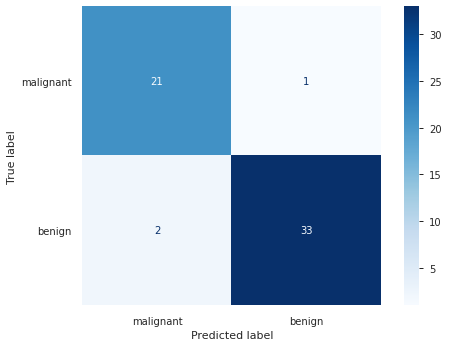

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay 

dt = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(max_depth=5),
)

dt.fit(X_train, y_train)
print(f"Descision Tree score: {dt.score(X_test, y_test):.2f}")

disp = ConfusionMatrixDisplay.from_estimator(
        dt,
        X_test,
        y_test,
        display_labels=target_names,
        cmap=plt.cm.Blues
    )

Decision trees are also interpretable models.  
Scikit-learn provides an efficient way to visualize their structure.  

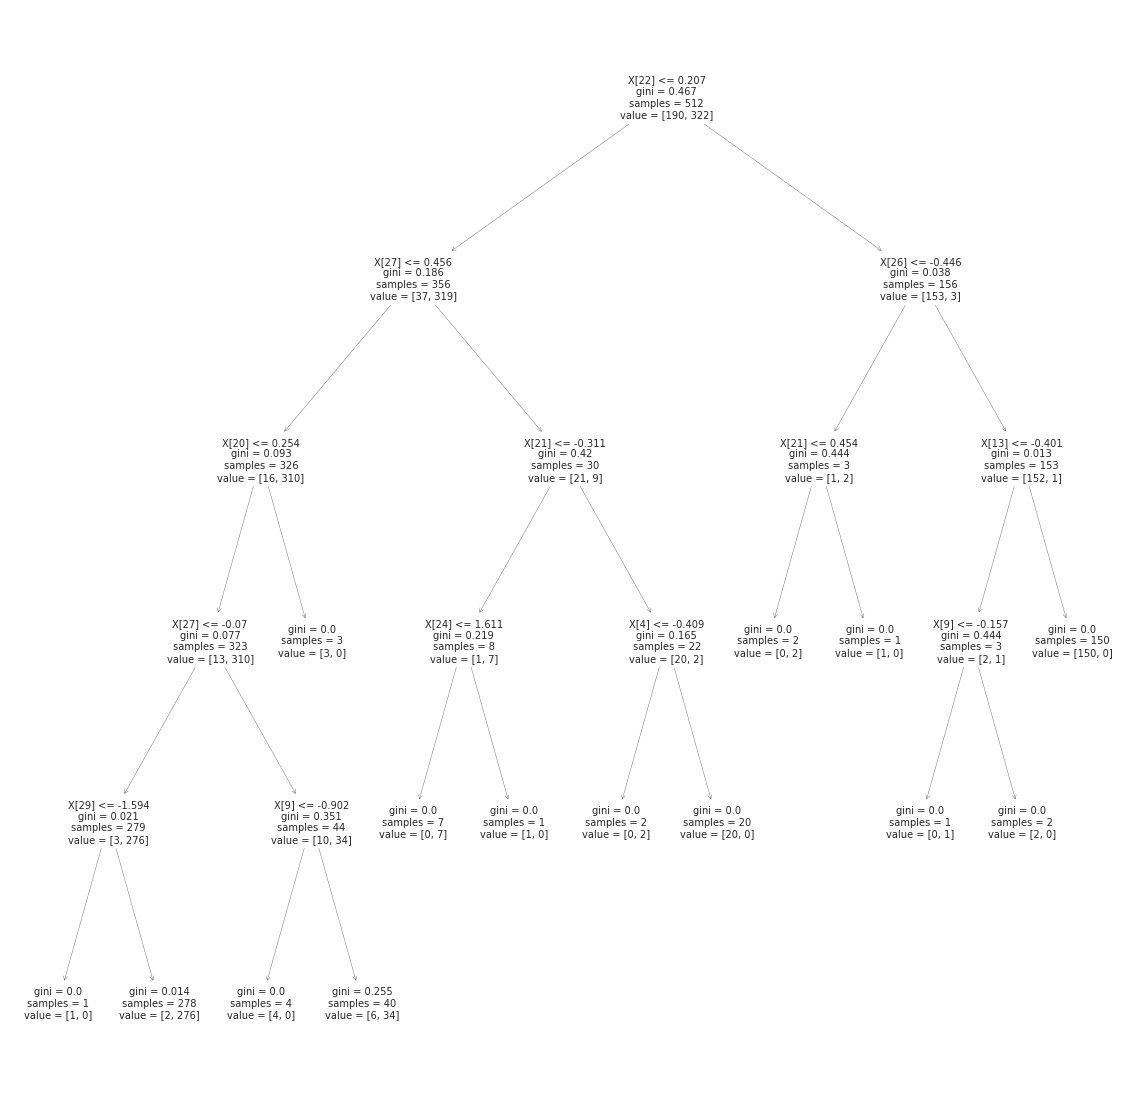

In [ ]:
import matplotlib.pyplot as plt
import sklearn.tree as tree
plt.figure(figsize=(20,20))
tree.plot_tree(dt[1])
plt.show()

Explain the predictions of your model on some examples.  
For classification tasks, LIME needs the predicted "probailities" of the model.  
Use the ```predict_proba``` method of your classifier instead of the ```predict``` method when calling the explain instance.    
Also, don't forget to remove the ```mode="regression"``` argument when instanciating the ```LimeTabularExplainer```.  
Are the explanations consistent with the decision graph?